In [2]:
import pandas as pd
import osmnx
import geopandas
import rioxarray
import xarray
import datashader
import contextily as cx
from shapely.geometry import box
import matplotlib.pyplot as plt

# Graficos espaciales

In [3]:
graph = osmnx.graph_from_place("Parque de Doña Casilda de Iturrizar, Bilbao, Spain")

In [4]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

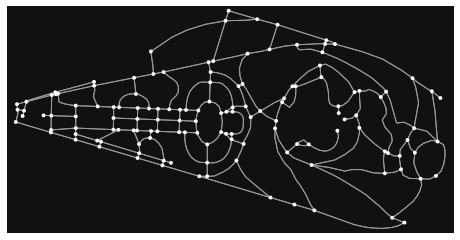

In [5]:
osmnx.plot_graph(graph)
plt.show()

Número de aristas

In [6]:
len(graph.nodes)

136

Número de nodos

In [7]:
len(graph.edges)

406

Características de un nodo

In [8]:
graph.nodes[309661936]

{'y': 43.266601, 'x': -2.9403764, 'street_count': 4}

Características de una arista

In [9]:
graph.edges[(309661936, 1828478522, 0)]

{'osmid': 169211946, 'highway': 'footway', 'oneway': False, 'length': 57.574}

Qué nodos están conectados al nodo '309661936'

In [10]:
list(graph.adj[309661936].keys())

[1828478522, 1803730630, 550078971]

- Donostia

In [11]:
graph = osmnx.graph_from_place("Donostia, Spain")

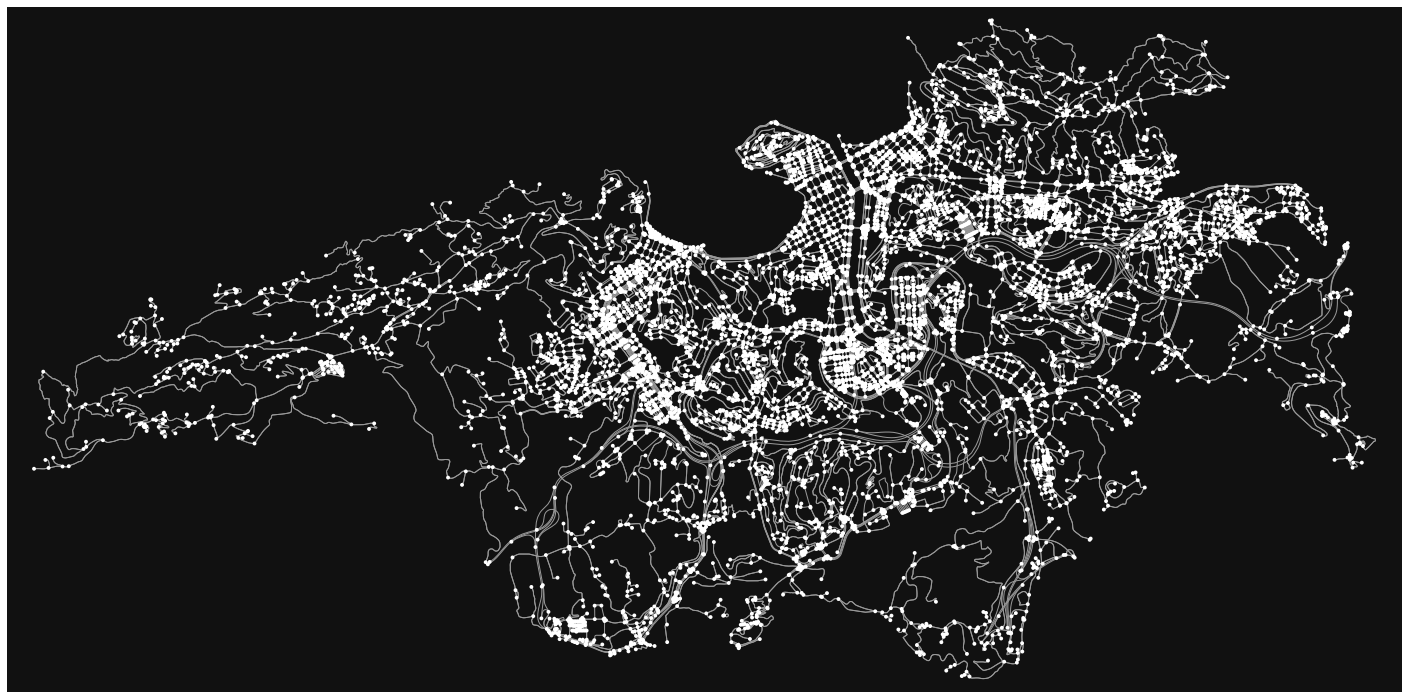

In [12]:
osmnx.plot_graph(graph,figsize=(25,20))
plt.show()

In [13]:
datos = []
for i in list(graph.nodes):
    res = [graph.nodes[i][key] for key in graph.nodes[i].keys() & {'x', 'y'}]
    datos.append(res)

In [14]:
nodos = pd.DataFrame(datos,columns=['x','y'])
nodos

,x,y
0,-2.013269,43.295253
1,-1.992716,43.297215
2,-1.983074,43.298048
3,-1.942476,43.311912
4,-1.978867,43.318684
...,...,...
9124,-1.987797,43.315503
9125,-1.987762,43.315474
9126,-1.987694,43.315404
9127,-1.987656,43.315352


C:\Users\Julen Montes\AppData\Roaming\Python\Python38\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


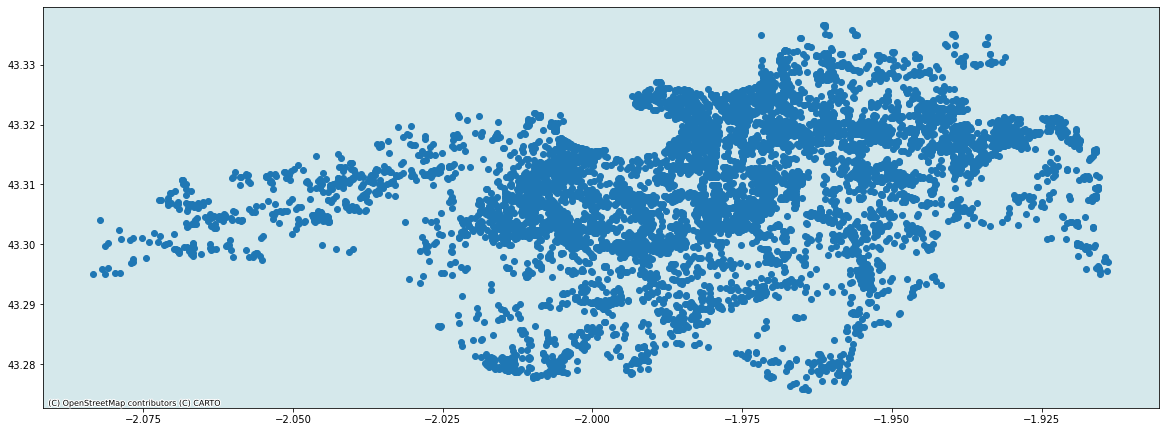

In [25]:
nodos_gdf = geopandas.GeoDataFrame(
    nodos, geometry=geopandas.points_from_xy(nodos.x, nodos.y))
ax = nodos_gdf.plot(figsize=(20,20))
cx.add_basemap(ax, 
               crs=
               source=cx.providers.CartoDB.Voyager
              )

In [16]:
cvs = datashader.Canvas(plot_width=60,
                        plot_height=60
                       )

In [17]:
grid = cvs.points(nodos_gdf, 
                  x="x", 
                  y="y"
                 )

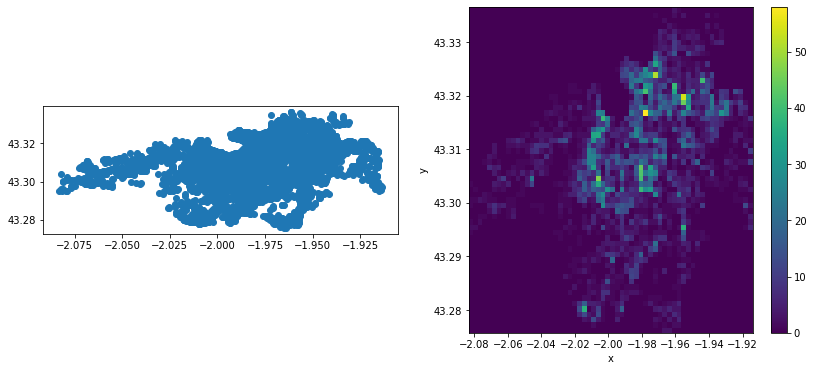

In [18]:
f, axs = plt.subplots(1, 2, figsize=(14, 6))
nodos_gdf.plot(ax=axs[0])
grid.plot(ax=axs[1]);

In [19]:
gt_intersections, gt_lines = osmnx.graph_to_gdfs(graph)

In [20]:
gt_intersections.head()

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
528532,43.295253,-2.013269,12,motorway_junction,3,POINT (-2.01327 43.29525)
528543,43.297215,-1.992716,NaN,NaN,3,POINT (-1.99272 43.29721)
528557,43.298048,-1.983074,9A,motorway_junction,3,POINT (-1.98307 43.29805)
528581,43.311912,-1.942476,NaN,NaN,3,POINT (-1.94248 43.31191)
537901,43.318684,-1.978867,NaN,NaN,3,POINT (-1.97887 43.31868)


In [21]:
gt_lines.head()

osmid  \
u      v          key                                                      
528532 939305     0                                              7631787   
       293217537  0    [37076226, 37076227, 781432572, 41292306, 4129...   
528543 528557     0                                 [24030074, 24030075]   
528557 5669818357 0    [6280204, 24012692, 24012693, 7631798, 2401260...   
       260687244  0                                             44717621   

                       oneway                   highway    length  \
u      v          key                                               
528532 939305     0      True             motorway_link   475.500   
       293217537  0      True                  motorway  1269.090   
528543 528557     0      True                  motorway   797.184   
528557 5669818357 0      True  [motorway_link, primary]   770.960   
       260687244  0      True                  motorway   208.609   

                                                                geometry  \
u      v          key                                                      
528532 939305     0    LINESTRING (-2.01327 43.29525, -2.01234 43.295...   
       293217537  0    LINESTRING (-2.01327 43.29525, -2.01231 43.295...   
528543 528557     0    LINESTRING (-1.99272 43.29721, -1.99194 43.297...   
528557 5669818357 0    LINESTRING (-1.98307 43.29805, -1.98180 43.298...   
       260687244  0    LINESTRING (-1.98307 43.29805, -1.98148 43.298...   

                         ref  \
u      v          key          
528532 939305     0      NaN   
       293217537  0    GI-20   
528543 528557     0    GI-20   
528557 5669818357 0      NaN   
       260687244  0    GI-20   

                                                                   name  \
u      v          key                                                     
528532 939305     0                                                 NaN   
       293217537  0    [Donostiako Saihesbidea, DonostiakoSsaihesbidea]   
528543 528557     0                              Donostiako Saihesbidea   
528557 5669818357 0                             Karlos I.aren hiribidea   
       260687244  0                              Donostiako Saihesbidea   

                       maxspeed bridge tunnel lanes junction service access  \
u      v          key                                                         
528532 939305     0         NaN    NaN    NaN   NaN      NaN     NaN    NaN   
       293217537  0          80    yes    NaN   NaN      NaN     NaN    NaN   
528543 528557     0          80    NaN    yes   NaN      NaN     NaN    NaN   
528557 5669818357 0    [80, 50]    yes    yes     2      NaN     NaN    NaN   
       260687244  0          80    NaN    NaN   NaN      NaN     NaN    NaN   

                      width  
u      v          key        
528532 939305     0     NaN  
       293217537  0     NaN  
528543 528557     0     NaN  
528557 5669818357 0     NaN  
       260687244  0     NaN

In [22]:
new_graph = osmnx.graph_from_gdfs(gt_intersections, gt_lines)